In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from research_utils.database.database import Database

## Network Concentration as a Function of Size

In [2]:
database = Database()

In [3]:
sql = """
SELECT a.organization, a.package, gini_coefficient,
	   stakeholder_count, issue_count
FROM (
	SELECT organization, package, gini_coefficient
	FROM open_source.stakeholder_networks
) a
INNER JOIN (
	SELECT organization, package, 
	COUNT(DISTINCT user_id) AS stakeholder_count,
	COUNT(DISTINCT issue_number) AS issue_count
	FROM open_source.issue_comments
	GROUP BY organization, package
) b
ON (a.package = b.package
AND a.organization = b.organization)
"""

In [4]:
df = pd.read_sql(sql, database.connection)

(0, 0.7)

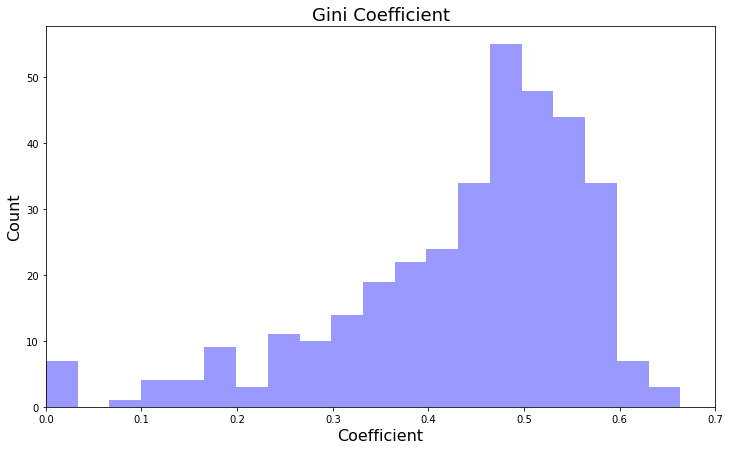

In [9]:
plt.figure(figsize=(12, 7))
sns.distplot(df['gini_coefficient'], kde=False, color='blue', bins=20)
plt.title('Gini Coefficient', fontsize=18)
plt.xlabel('Coefficient', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,.7])

Text(0, 0.5, 'Gini Coefficient')

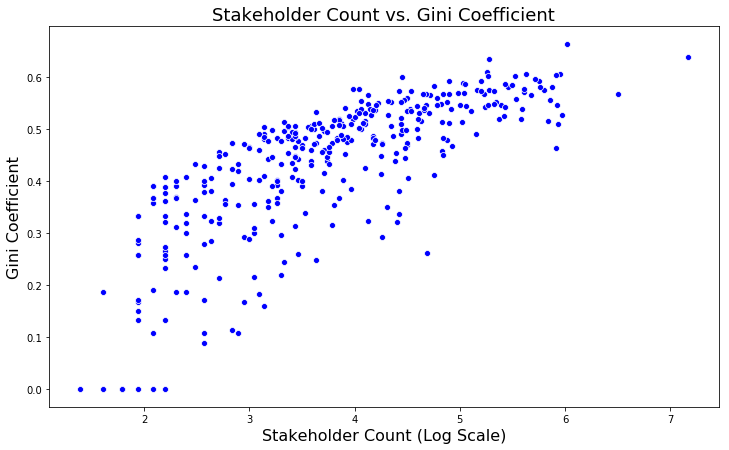

In [18]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['stakeholder_count']), y=df['gini_coefficient'], color='blue')
plt.title('Stakeholder Count vs. Gini Coefficient', fontsize=18)
plt.xlabel('Stakeholder Count (Log Scale)', fontsize=16)
plt.ylabel('Gini Coefficient', fontsize=16)

Text(0, 0.5, 'Gini Coefficient')

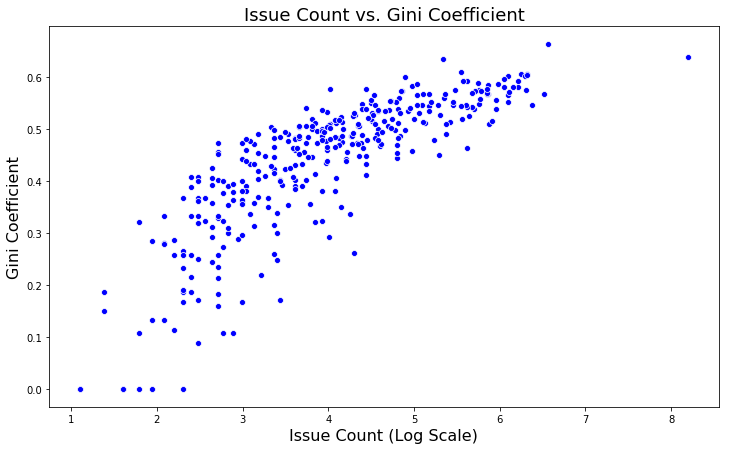

In [17]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=np.log(df['issue_count']), y=df['gini_coefficient'], color='blue')
plt.title('Issue Count vs. Gini Coefficient', fontsize=18)
plt.xlabel('Issue Count (Log Scale)', fontsize=16)
plt.ylabel('Gini Coefficient', fontsize=16)

In [20]:
df.sort_values('gini_coefficient', ascending=False).head(50)

,organization,package,gini_coefficient,stakeholder_count,issue_count
241,ocornut,imgui,0.663207,410,705
286,saltstack,salt,0.637937,1300,3635
207,metafizzy,flickity,0.634083,195,208
123,google,guava,0.608675,192,256
221,mrniko,redisson,0.605817,279,552
216,mobxjs,mobx,0.605711,383,520
275,realm,realm-java,0.604096,369,555
274,ReactiveX,RxJava,0.601852,194,542
113,getgrav,grav,0.601171,250,444
289,schmittjoh,serializer,0.599206,86,134


In [21]:
df.sort_values('gini_coefficient', ascending=False).tail(50)

,organization,package,gini_coefficient,stakeholder_count,issue_count
76,ekg,vcflib,0.292614,19,14
149,Intervention,image,0.292494,71,55
235,novus,nvd3,0.289256,20,19
146,ibayer,fastFM,0.285714,7,9
144,HubSpot,pace,0.284848,14,7
137,guillaumepotier,Garlic.js,0.280000,7,8
293,sebastianbergmann,dbunit,0.279167,13,8
281,rmccue,Requests,0.273504,9,16
166,jobbyphp,jobby,0.265625,9,10
209,mher,flower,0.261364,109,74
